In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\ChickPea\Full_ChickPea_dataset.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year','index'])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [5]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [6]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [7]:
df = df.drop(columns=['stl2_11','stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12','stl3_1', 'stl3_2', 'stl3_3', 'stl3_4'])

In [8]:
df.shape

(5550, 85)

In [9]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl4_11',
       'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11',
       'swvl1_12', 'swvl1_1', 'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11',
       'swvl2_12', 'swvl2_1', 'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11',
       'swvl3_12', 'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11',
       'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12',
       'ssr_11', 'ssr_1', 'ssr_2', 'ssr_3', 'ssr_4', 'u10_11', 'u10_12',
       'u10_1', 'u10_2', 'u10_3', 'u10_4', 'v10_11', 'v10_12', 'v10_1',
       'v10_2', 'v10_3', 'v10_4', 'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2',
       'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3',
       'tmin_4', 'rain_11', 'rain_12', 'rain_1', 'rain_2', 'rain_3', 'rain_4',
       'countrain_11', 'countrain_12', 'countrain_1', 'countrain_2',
       'countrain_3', 'countrain_4', 'rh_11', 'rh_12', 'rh_1', 'rh_2', 'rh_3',
       'rh_4', 'Yield(Ton

In [10]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [11]:
df.shape

(4537, 85)

In [12]:
df['Yield(Tonnes/Hectare)'].skew()

6.509536996491297

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_23656\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

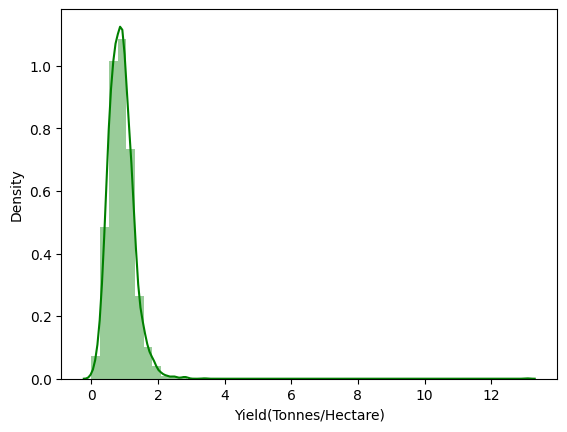

In [13]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [14]:
df['Yield(Tonnes/Hectare)']

0       0.95
1       1.24
2       0.39
3       1.30
5       1.33
        ... 
5545    1.17
5546    0.75
5547    0.56
5548    0.59
5549    0.26
Name: Yield(Tonnes/Hectare), Length: 4537, dtype: float64

In [15]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 4459


In [16]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [17]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [18]:
df['Yield(Tonnes/Hectare)'].skew()

0.2657581100607571

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_23656\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

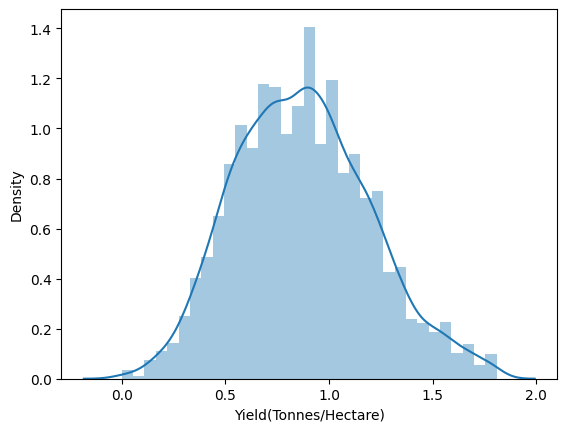

In [19]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [20]:
df.head(10)

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl4_11,stl4_12,stl4_1,stl4_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
0,23.806690,17.167067,15.370581,20.280177,22.635926,29.736510,29.190535,27.400601,24.584461,22.436700,...,0,8,2,42.541853,59.210452,72.438845,55.495103,54.614576,38.353248,0.95
1,22.942027,20.289454,19.730259,22.646645,28.067749,32.659535,27.454222,25.776696,24.011675,22.991249,...,0,0,0,55.762204,62.403004,64.739027,46.818167,30.833904,21.574929,1.24
2,22.254592,21.885506,22.232392,26.344706,30.319236,33.499066,25.163855,24.153779,23.396641,23.376164,...,0,0,0,83.170312,72.231308,57.289698,46.009245,39.412711,36.910807,0.39
3,22.522780,18.820395,17.063243,19.368418,26.316851,32.490352,28.110316,26.250242,23.958327,22.179842,...,1,0,7,41.323990,50.682901,52.715845,47.506102,27.859781,19.432031,1.30
5,23.014582,15.208111,14.586251,17.038982,21.515462,29.465503,27.985516,25.670011,22.108329,19.800529,...,1,6,1,66.230099,77.688090,78.013096,67.551938,66.932761,40.401128,1.33
6,25.982034,26.242282,25.770904,26.378708,27.350951,28.650909,24.849348,25.169154,25.447305,25.528891,...,0,0,3,69.454915,61.367290,58.278511,52.225822,64.039865,71.825358,0.73
9,23.316597,22.698823,23.741542,27.546119,30.860221,31.585946,24.712918,24.151000,23.784394,23.979579,...,0,1,9,79.301633,70.448466,55.301041,40.394030,32.845521,49.748610,0.35
10,24.331938,24.066577,25.667090,27.913998,32.035247,33.678790,25.617079,25.251802,24.982322,25.328845,...,0,1,5,72.664738,49.981731,41.510028,40.624673,44.162941,51.258802,0.66
14,22.506673,19.239250,16.354662,20.524517,26.426600,30.556690,27.815852,25.869833,23.478536,21.751510,...,0,0,2,66.335450,72.040604,77.731112,64.837462,44.440546,41.098728,1.06
15,25.361787,21.266491,20.425787,23.718438,29.828393,36.198576,28.983892,27.702694,25.972894,24.735063,...,1,1,0,41.187035,38.652306,41.193168,47.713627,21.408907,13.715948,0.77


In [21]:
df.shape

(4459, 85)

In [22]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [23]:
df.head()

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl4_11,stl4_12,stl4_1,stl4_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
0,23.806690,17.167067,15.370581,20.280177,22.635926,29.736510,29.190535,27.400601,24.584461,22.436700,...,0,8,2,42.541853,59.210452,72.438845,55.495103,54.614576,38.353248,0.95
1,22.942027,20.289454,19.730259,22.646645,28.067749,32.659535,27.454222,25.776696,24.011675,22.991249,...,0,0,0,55.762204,62.403004,64.739027,46.818167,30.833904,21.574929,1.24
2,22.254592,21.885506,22.232392,26.344706,30.319236,33.499066,25.163855,24.153779,23.396641,23.376164,...,0,0,0,83.170312,72.231308,57.289698,46.009245,39.412711,36.910807,0.39
3,22.522780,18.820395,17.063243,19.368418,26.316851,32.490352,28.110316,26.250242,23.958327,22.179842,...,1,0,7,41.323990,50.682901,52.715845,47.506102,27.859781,19.432031,1.30
5,23.014582,15.208111,14.586251,17.038982,21.515462,29.465503,27.985516,25.670011,22.108329,19.800529,...,1,6,1,66.230099,77.688090,78.013096,67.551938,66.932761,40.401128,1.33


In [24]:
df.shape

(4459, 85)

In [25]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl4_11',
       'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11',
       'swvl1_12', 'swvl1_1', 'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11',
       'swvl2_12', 'swvl2_1', 'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11',
       'swvl3_12', 'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11',
       'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12',
       'ssr_11', 'ssr_1', 'ssr_2', 'ssr_3', 'ssr_4', 'u10_11', 'u10_12',
       'u10_1', 'u10_2', 'u10_3', 'u10_4', 'v10_11', 'v10_12', 'v10_1',
       'v10_2', 'v10_3', 'v10_4', 'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2',
       'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3',
       'tmin_4', 'rain_11', 'rain_12', 'rain_1', 'rain_2', 'rain_3', 'rain_4',
       'countrain_11', 'countrain_12', 'countrain_1', 'countrain_2',
       'countrain_3', 'countrain_4', 'rh_11', 'rh_12', 'rh_1', 'rh_2', 'rh_3',
       'rh_4', 'Yield(Ton

In [26]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [27]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [28]:
df.shape

(4459, 85)

In [29]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.40, R^2 Score (Test): 0.37
[0.3994597844767528, 0.4038159070997912, 0.3384797754364889, 0.39097735082776064, 0.3871842484551785, 0.4237726479713726, 0.3245848112520636, 0.3044766405479129, 0.393338614977372, 0.3445110731328608]
Ridge Regression - R^2 Score (Train) : 0.38, R^2 Score (Test): 0.36
[0.33974867840384804, 0.3385515991716096, 0.3915390368814796, 0.35645264391623377, 0.381382687407157, 0.3856190633072314, 0.4061080826640765, 0.3123306714014433, 0.33907151588821216, 0.35644110152466557]


c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.05165e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.05556e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.13176e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.05237e-17): result may not be

XGB Regressor - R^2 Score (Train) : 0.99, R^2 Score (Test): 0.56
[0.5309854352255474, 0.5814656226044433, 0.5499257165610645, 0.5438112679792652, 0.5480219763892551, 0.5989531132509232, 0.5626509891099194, 0.5757890471861984, 0.5588156122368411, 0.5621877943936602]
Lasso Regression - R^2 Score (Train) : 0.15, R^2 Score (Test): 0.14
[0.16301342312675648, 0.11701931992408399, 0.13069654600066483, 0.13111371114036974, 0.13123720235469416, 0.17881563393990862, 0.15194021400537971, 0.148081990800496, 0.12062938102707133, 0.14456927214810278]
Decision Tree - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.07
[0.024357379509912236, 0.10664883819206339, 0.10154805033153036, 0.1762772154302742, 0.11947651162146755, -0.04454736618129318, 0.2627405986439555, 0.07560304990549183, 0.029793316564130423, -0.11499628327877764]
Gradient Boosting - R^2 Score (Train) : 0.61, R^2 Score (Test): 0.47
[0.4856214196034868, 0.5054598864441648, 0.466795529514472, 0.46232330033006563, 0.4930232080995488, 0.4284370

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [34]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [35]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

100


In [36]:
print(columns_to_drop)

['stl1_1', 'stl4_3', 'stl4_4', 'stl1_12', 'stl1_2', 'stl4_3', 'tmax_1', 'stl1_1', 'stl4_3', 'stl4_4', 'tmax_2', 'stl4_4', 'stl4_2', 'stl4_1', 'stl4_3', 'stl4_4', 'stl1_12', 'stl1_1', 'stl1_2', 'stl4_2', 'stl4_4', 'stl1_12', 'stl1_2', 'stl1_3', 'stl4_2', 'stl4_3', 'swvl2_11', 'swvl1_11', 'swvl2_12', 'swvl2_11', 'swvl2_3', 'swvl2_2', 'swvl2_4', 'swvl2_3', 'swvl3_12', 'swvl3_1', 'swvl3_2', 'swvl3_11', 'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl3_11', 'swvl3_12', 'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl3_11', 'swvl3_12', 'swvl3_1', 'swvl3_3', 'swvl3_4', 'swvl3_12', 'swvl3_1', 'swvl3_2', 'swvl3_4', 'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'swvl4_11', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'swvl4_11', 'swvl4_12', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'swvl4_11', 'swvl4_12', 'swvl4_1', 'swvl4_3', 'swvl4_4', 'swvl4_11', 'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_4', 'swvl4_11', 'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'u10_12', 'u10_11', 'u10_1', 'u10

In [37]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_12 : [('stl1_1', 0.937), ('stl4_3', 0.9147), ('stl4_4', 0.9093)]
stl1_1 : [('stl1_12', 0.937), ('stl1_2', 0.9397), ('stl4_3', 0.9116), ('tmax_1', 0.9393)]
stl1_2 : [('stl1_1', 0.9397), ('stl4_3', 0.9292), ('stl4_4', 0.9209), ('tmax_2', 0.9391)]
stl1_3 : [('stl4_4', 0.941)]
stl4_1 : [('stl4_2', 0.928)]
stl4_2 : [('stl4_1', 0.928), ('stl4_3', 0.9823), ('stl4_4', 0.9596)]
stl4_3 : [('stl1_12', 0.9147), ('stl1_1', 0.9116), ('stl1_2', 0.9292), ('stl4_2', 0.9823), ('stl4_4', 0.988)]
stl4_4 : [('stl1_12', 0.9093), ('stl1_2', 0.9209), ('stl1_3', 0.941), ('stl4_2', 0.9596), ('stl4_3', 0.988)]
swvl1_11 : [('swvl2_11', 0.9295)]
swvl2_11 : [('swvl1_11', 0.9295), ('swvl2_12', 0.9073)]
swvl2_12 : [('swvl2_11', 0.9073)]
swvl2_2 : [('swvl2_3', 0.9052)]
swvl2_3 : [('swvl2_2', 0.9052), ('swvl2_4', 0.9158)]
swvl2_4 : [('swvl2_3', 0.9158)]
swvl3_11 : [('swvl3_12', 0.9833), ('swvl3_1', 0.952), ('swvl3_2', 0.9116)]
swvl3_12 : [('swvl3_11', 0.9833), ('swvl3_1', 0.9847), ('swv

In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")